# Prompting tasks using LangGraph
In this notebook we demonstrate how to prompt for executing tasks using chatGPT and [LangGraph](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/#usage). Using English language, we ask for doing something with data, and LangChain will execute the task.

In [1]:
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
import os

To demonstrate how this works, we define three functions that modify a string and collect them in a list called `tools`.

In [2]:
tools = []

In [3]:
@tools.append
@tool
def upper_case(text:str):
    """Useful for making a text uppercase or capital letters."""
    return text.upper()

@tools.append
@tool
def lower_case(text:str):
    """Useful for making a text lowercase or small letters."""
    return text.lower()

@tools.append
@tool
def reverse(text:str):
    """Useful for making reversing order of a text."""
    return text[::-1]

We create some memory and a large language model based on OpenAI's chatGPT.

In [4]:
llm=ChatOpenAI(
    temperature=0,
    #model_name="Qwen/QwQ-32B-Preview", #"meta-llama/Llama-3.3-70B-Instruct",
    #api_key=os.environ.get('SCADSAI_API_KEY'),
    #base_url="https://llm.scads.ai/v1"
)

Given the list of tools, the large language model and the memory, we can create an agent.

In [5]:
# Define the graph
graph = create_react_agent(llm, tools=tools)

In [6]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

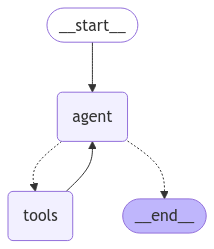

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
memory = []
def ask(prompt):
    inputs = {"messages": memory + [("user", prompt)]}
    result = list(graph.stream(inputs, stream_mode="values"))
    #for r in result:
    #    print(len(r["messages"]))
    #memory.extend([r["messages"][-1] for r in result])
    memory.clear()
    memory.extend(result[-1]["messages"])
    print_stream(result)

This agent can then respond to prompts.

In [9]:
ask("Hi, I am Robert")

================================ Human Message =================================

Hi, I am Robert
================================== Ai Message ==================================

Hello Robert! How can I assist you today?


As it has memory, it can remind information we gave it earlier.

In [10]:
ask("What's my name?")

================================ Human Message =================================

What's my name?
================================== Ai Message ==================================
Tool Calls:
  upper_case (call_GmiYGbwDpR2Fvo5A3ukWS6of)
 Call ID: call_GmiYGbwDpR2Fvo5A3ukWS6of
  Args:
    text: Robert
================================= Tool Message =================================
Name: upper_case

ROBERT
================================== Ai Message ==================================

Your name is ROBERT. How can I assist you further, Robert?


And we can use English language to apply one of the functions above.

In [11]:
ask("Can you reverse my name?")

================================ Human Message =================================

Can you reverse my name?
================================== Ai Message ==================================
Tool Calls:
  reverse (call_Dl74CugeiNHz7ZKV9dIVJhqe)
 Call ID: call_Dl74CugeiNHz7ZKV9dIVJhqe
  Args:
    text: ROBERT
================================= Tool Message =================================
Name: reverse

TREBOR
================================== Ai Message ==================================

Your name reversed is TREBOR. Is there anything else you would like to know or do, Robert?


Multiple tasks can also be chained.

In [12]:
ask("Do you know my name reversed and upper case?")

================================ Human Message =================================

Do you know my name reversed and upper case?
================================== Ai Message ==================================
Tool Calls:
  reverse (call_YOotDzvHOpLnqi5IDQH97IyV)
 Call ID: call_YOotDzvHOpLnqi5IDQH97IyV
  Args:
    text: ROBERT
  upper_case (call_oajv3uAydFuJtFDeIhq8EIT7)
 Call ID: call_oajv3uAydFuJtFDeIhq8EIT7
  Args:
    text: TREBOR
================================= Tool Message =================================
Name: upper_case

TREBOR
================================== Ai Message ==================================

Your name reversed and in uppercase is TREBOR. If you have any other requests or questions, feel free to let me know!


## Exercise
Add a `print('Hello world')` to the function `reverse`, rerun the entire notebook and execue the last cell above multiple times. Is the `Hello world` printed every time? If not, why?